In [1]:
###############################################################################
# Date:        Oct. 23rd 2019
# Name:      Peiying Lyu 
#ID:              8109407016
# Course:    INF 552, HW4
#
################################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  1.The LASSO and Boosting for Regression

 ## a. Download the Communities and Crime data

In [2]:
mypath = "D:/552 Machine Learning for Data Science/homework/Homework4/"
filename = "communities.names"
filename2 = "communities.data"

# get the headers
f=open(mypath+filename,"r")

lines=f.readlines()
headers=[]
for l in lines:
    if "@attribute" in l:
        l = l.replace("@attribute ","")
        l = l.replace("\n","")
        l= l.replace(" numeric","")
        l = l.replace(" string","")
        headers.append(l)
f.close()
# print(headers)full_df = pd.DataFrame()

#full-df
full_df = pd.DataFrame()
full_df = pd.read_csv(mypath+filename2, delimiter =',' , header = None)
full_df.columns = headers
full_df = full_df.replace('?', np.NaN)

print(type(full_df))
print(full_df.shape)
# print(full_df)

#train_df
train_df = pd.DataFrame()
train_df = full_df.iloc[:1495,]
print(train_df.shape)

#test_df
test_df = pd.DataFrame()
test_df = full_df.iloc[1495:,]
print(test_df.shape)

<class 'pandas.core.frame.DataFrame'>
(1994, 128)
(1495, 128)
(499, 128)


In [3]:
full_df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
5,6,NaN,NaN,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.00,NaN,0.14
6,44,7,41500,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,0.05,0.08,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.03
7,6,NaN,NaN,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,0.01,0.33,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.55
8,21,NaN,NaN,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,0.04,0.17,0.04,NaN,NaN,NaN,NaN,0.00,NaN,0.53
9,29,NaN,NaN,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,0.00,0.47,0.11,NaN,NaN,NaN,NaN,0.00,NaN,0.15


In [4]:
train_df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
5,6,NaN,NaN,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.00,NaN,0.14
6,44,7,41500,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,0.05,0.08,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.03
7,6,NaN,NaN,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,0.01,0.33,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.55
8,21,NaN,NaN,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,0.04,0.17,0.04,NaN,NaN,NaN,NaN,0.00,NaN,0.53
9,29,NaN,NaN,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,0.00,0.47,0.11,NaN,NaN,NaN,NaN,0.00,NaN,0.15


In [5]:
test_df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1495,6,NaN,NaN,MillValleycity,8,0.00,0.20,0.03,0.91,0.23,...,0.01,0.23,0.73,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1496,48,NaN,NaN,LiveOakcity,8,0.00,0.55,0.13,0.78,0.15,...,0.01,0.18,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.11
1497,35,NaN,NaN,Portalescity,8,0.00,0.52,0.04,0.59,0.05,...,0.01,0.18,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1498,42,17,25112,Fallstownship,8,0.04,0.51,0.07,0.92,0.09,...,0.06,0.13,0.16,NaN,NaN,NaN,NaN,0.00,NaN,0.06
1499,51,683,48952,Manassascity,8,0.03,0.59,0.20,0.75,0.19,...,0.03,0.23,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1500,6,NaN,NaN,PalosVerdesEstatescity,8,0.01,0.48,0.02,0.77,0.84,...,0.01,0.23,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.04
1501,6,NaN,NaN,Mantecacity,8,0.05,0.64,0.03,0.84,0.21,...,0.02,0.39,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.25
1502,53,NaN,NaN,Tacomacity,8,0.27,0.37,0.22,0.67,0.42,...,0.14,0.31,0.22,0.25,0.09,0.84,1,0.45,0.21,0.76
1503,25,1,29020,Harwichtown,8,0.00,0.24,0.01,0.95,0.01,...,0.06,0.04,0.03,NaN,NaN,NaN,NaN,0.00,NaN,0.15
1504,36,111,39727,Kingstoncity,8,0.02,0.32,0.20,0.81,0.08,...,0.02,0.26,0.09,NaN,NaN,NaN,NaN,0.00,NaN,0.14


## b. use data imputation (mean) to deal with the missing values

In [6]:
from sklearn.base import TransformerMixin
#communityname
new_ignore_full_df = []
new_train_df = []
new_test_df = []

from sklearn.impute import SimpleImputer

mis_set = full_df.iloc[:,5:]
# print(mis_set)
new_columns = mis_set.columns

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(mis_set)
new_ignore_full_df=pd.DataFrame(imp.transform(mis_set))
new_ignore_full_df.columns=new_columns
new_ignore_train_df=full_df.iloc[:1495,:]
new_ignore_test_df=full_df.iloc[1495:,:]



In [7]:
new_ignore_full_df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.01,0.58,0.10,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.14
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.05,0.08,0.06,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.01,0.33,0.00,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.55
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.04,0.17,0.04,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.53
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.00,0.47,0.11,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.15


## c. Plot a correlation matrix for the features in the data set.

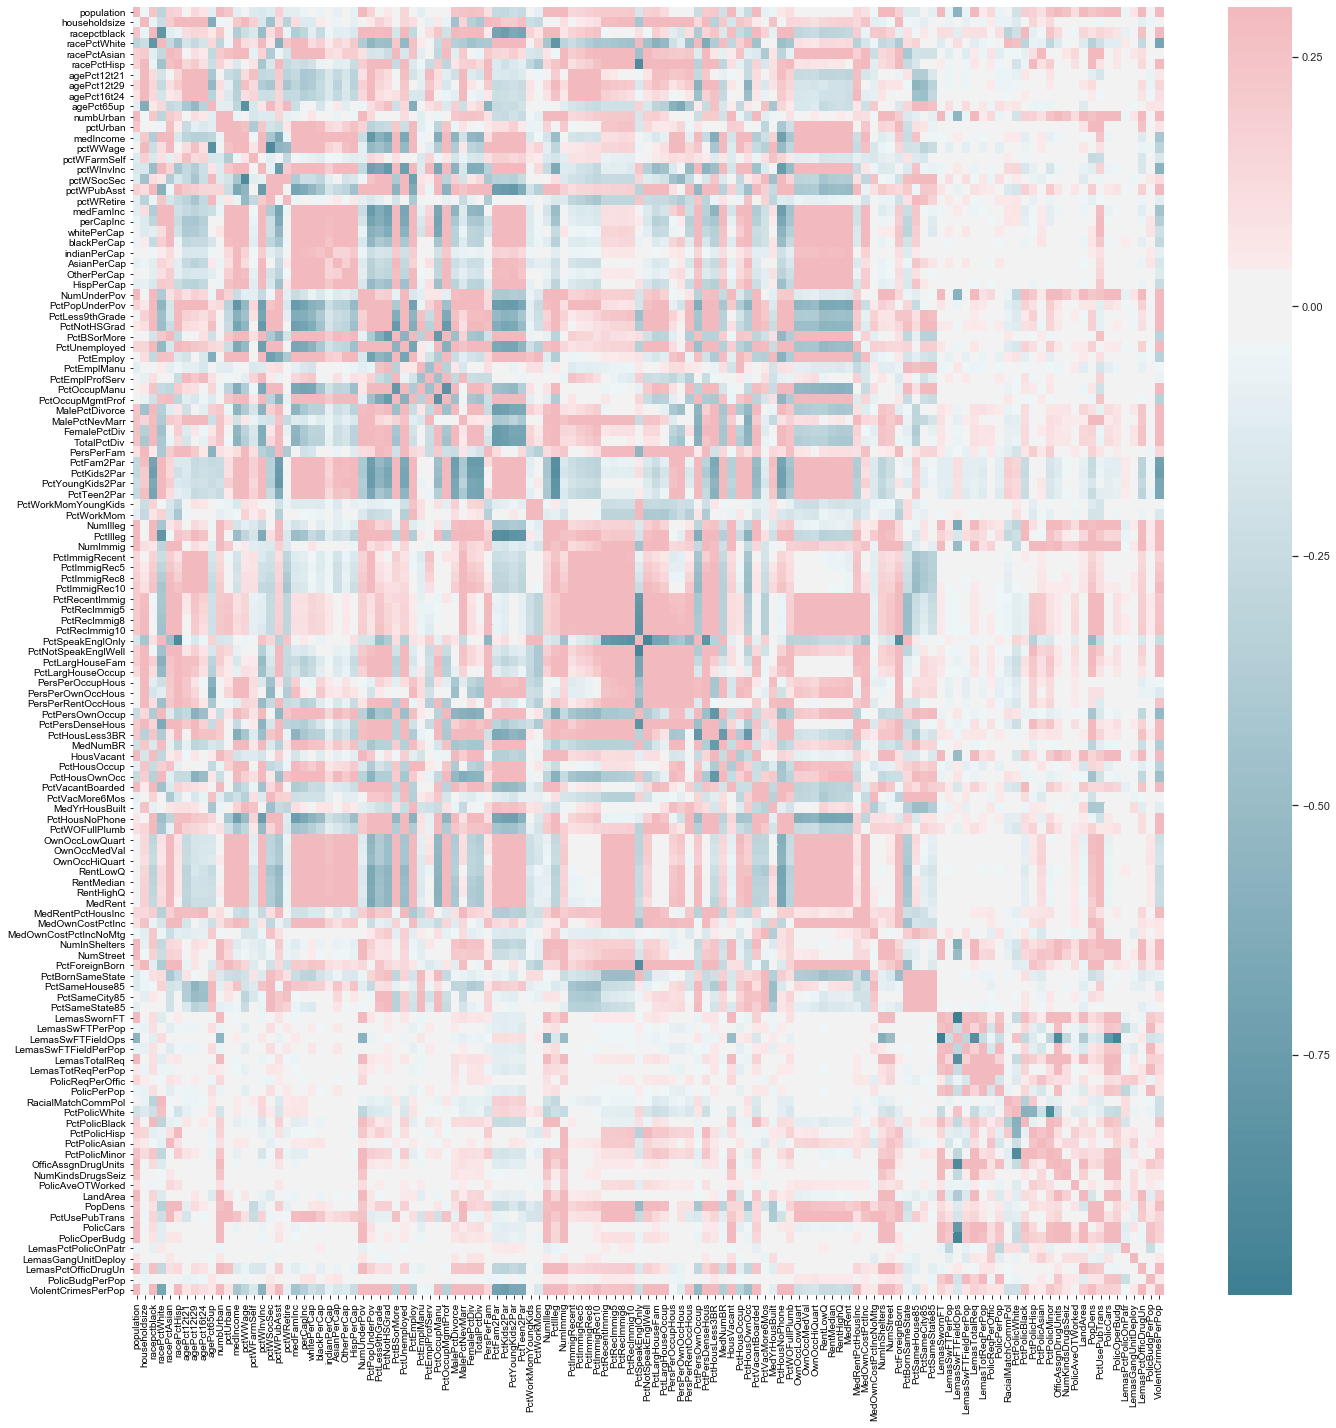

In [8]:
import seaborn as sns

corr = new_ignore_full_df.corr()

f, ax = plt.subplots(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set(style="white")
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
                   xticklabels=corr.columns.values, yticklabels=corr.columns.values)

plt.tight_layout()
plt.show()

## d. Calculate the Coefficient of Variation CV for each feature, where CV =std_v/mean_v

In [9]:
temp_df = pd.DataFrame()
temp_df = new_ignore_full_df#.select_dtypes(exclude = ['object'])
# temp_df = new_ignore_full_df.drop(['state', 'county', 'community', 'communityname', 'fold'], axis=1)
print(temp_df.shape)


mean_v=temp_df.mean()
std_v = temp_df.std()

# print(len(mean_v))
# print(mean_v.shape)

cv = std_v/mean_v
print(type(cv))
cv

# cv

(1994, 123)
<class 'pandas.core.series.Series'>


population              2.203503
householdsize           0.353298
racepctblack            1.410920
racePctWhite            0.323782
racePctAsian            1.359162
racePctHisp             1.614278
agePct12t21             0.365840
agePct12t29             0.290693
agePct16t24             0.495161
agePct65up              0.423442
numbUrban               2.001744
pctUrban                0.638849
medIncome               0.579753
pctWWage                0.327710
pctWFarmSelf            0.700030
pctWInvInc              0.359240
pctWSocSec              0.368513
pctWPubAsst             0.699031
pctWRetire              0.349639
medFamInc               0.527732
perCapInc               0.545633
whitePerCap             0.507552
blackPerCap             0.589469
indianPerCap            0.809685
AsianPerCap             0.606194
OtherPerCap             0.670645
HispPerCap              0.473960
NumUnderPov             2.304970
PctPopUnderPov          0.753980
PctLess9thGrade         0.675600
          

## e. Pick √128 features with highest CV ,

In [10]:
import math
num = math.sqrt(128)
num = int(num)
print(num)

best_cv = pd.DataFrame()
top = []

a = cv.sort_values(ascending = False)[:num]
al = list(a.keys())
print('features name: ',al)
best_cv = temp_df [al]

best_cv

11
features name:  ['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'numbUrban', 'HousVacant', 'LandArea', 'racePctHisp']


,NumStreet,NumInShelters,NumIlleg,NumImmig,LemasPctOfficDrugUn,NumUnderPov,population,numbUrban,HousVacant,LandArea,racePctHisp
0,0.00,0.04,0.04,0.03,0.32,0.08,0.19,0.20,0.21,0.12,0.17
1,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.02,0.02,0.07
2,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.04
3,0.00,0.00,0.03,0.02,0.00,0.01,0.04,0.06,0.01,0.02,0.10
4,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.04,0.05
5,0.00,0.00,0.00,0.04,0.00,0.01,0.02,0.04,0.02,0.01,0.25
6,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.02,0.01,0.05,0.02
7,0.00,0.00,0.02,0.02,0.00,0.03,0.01,0.00,0.01,0.01,1.00
8,0.00,0.01,0.02,0.00,0.00,0.04,0.03,0.04,0.04,0.04,0.00
9,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.02,0.02,0.00,0.03


## make scatter plots and box plots for them

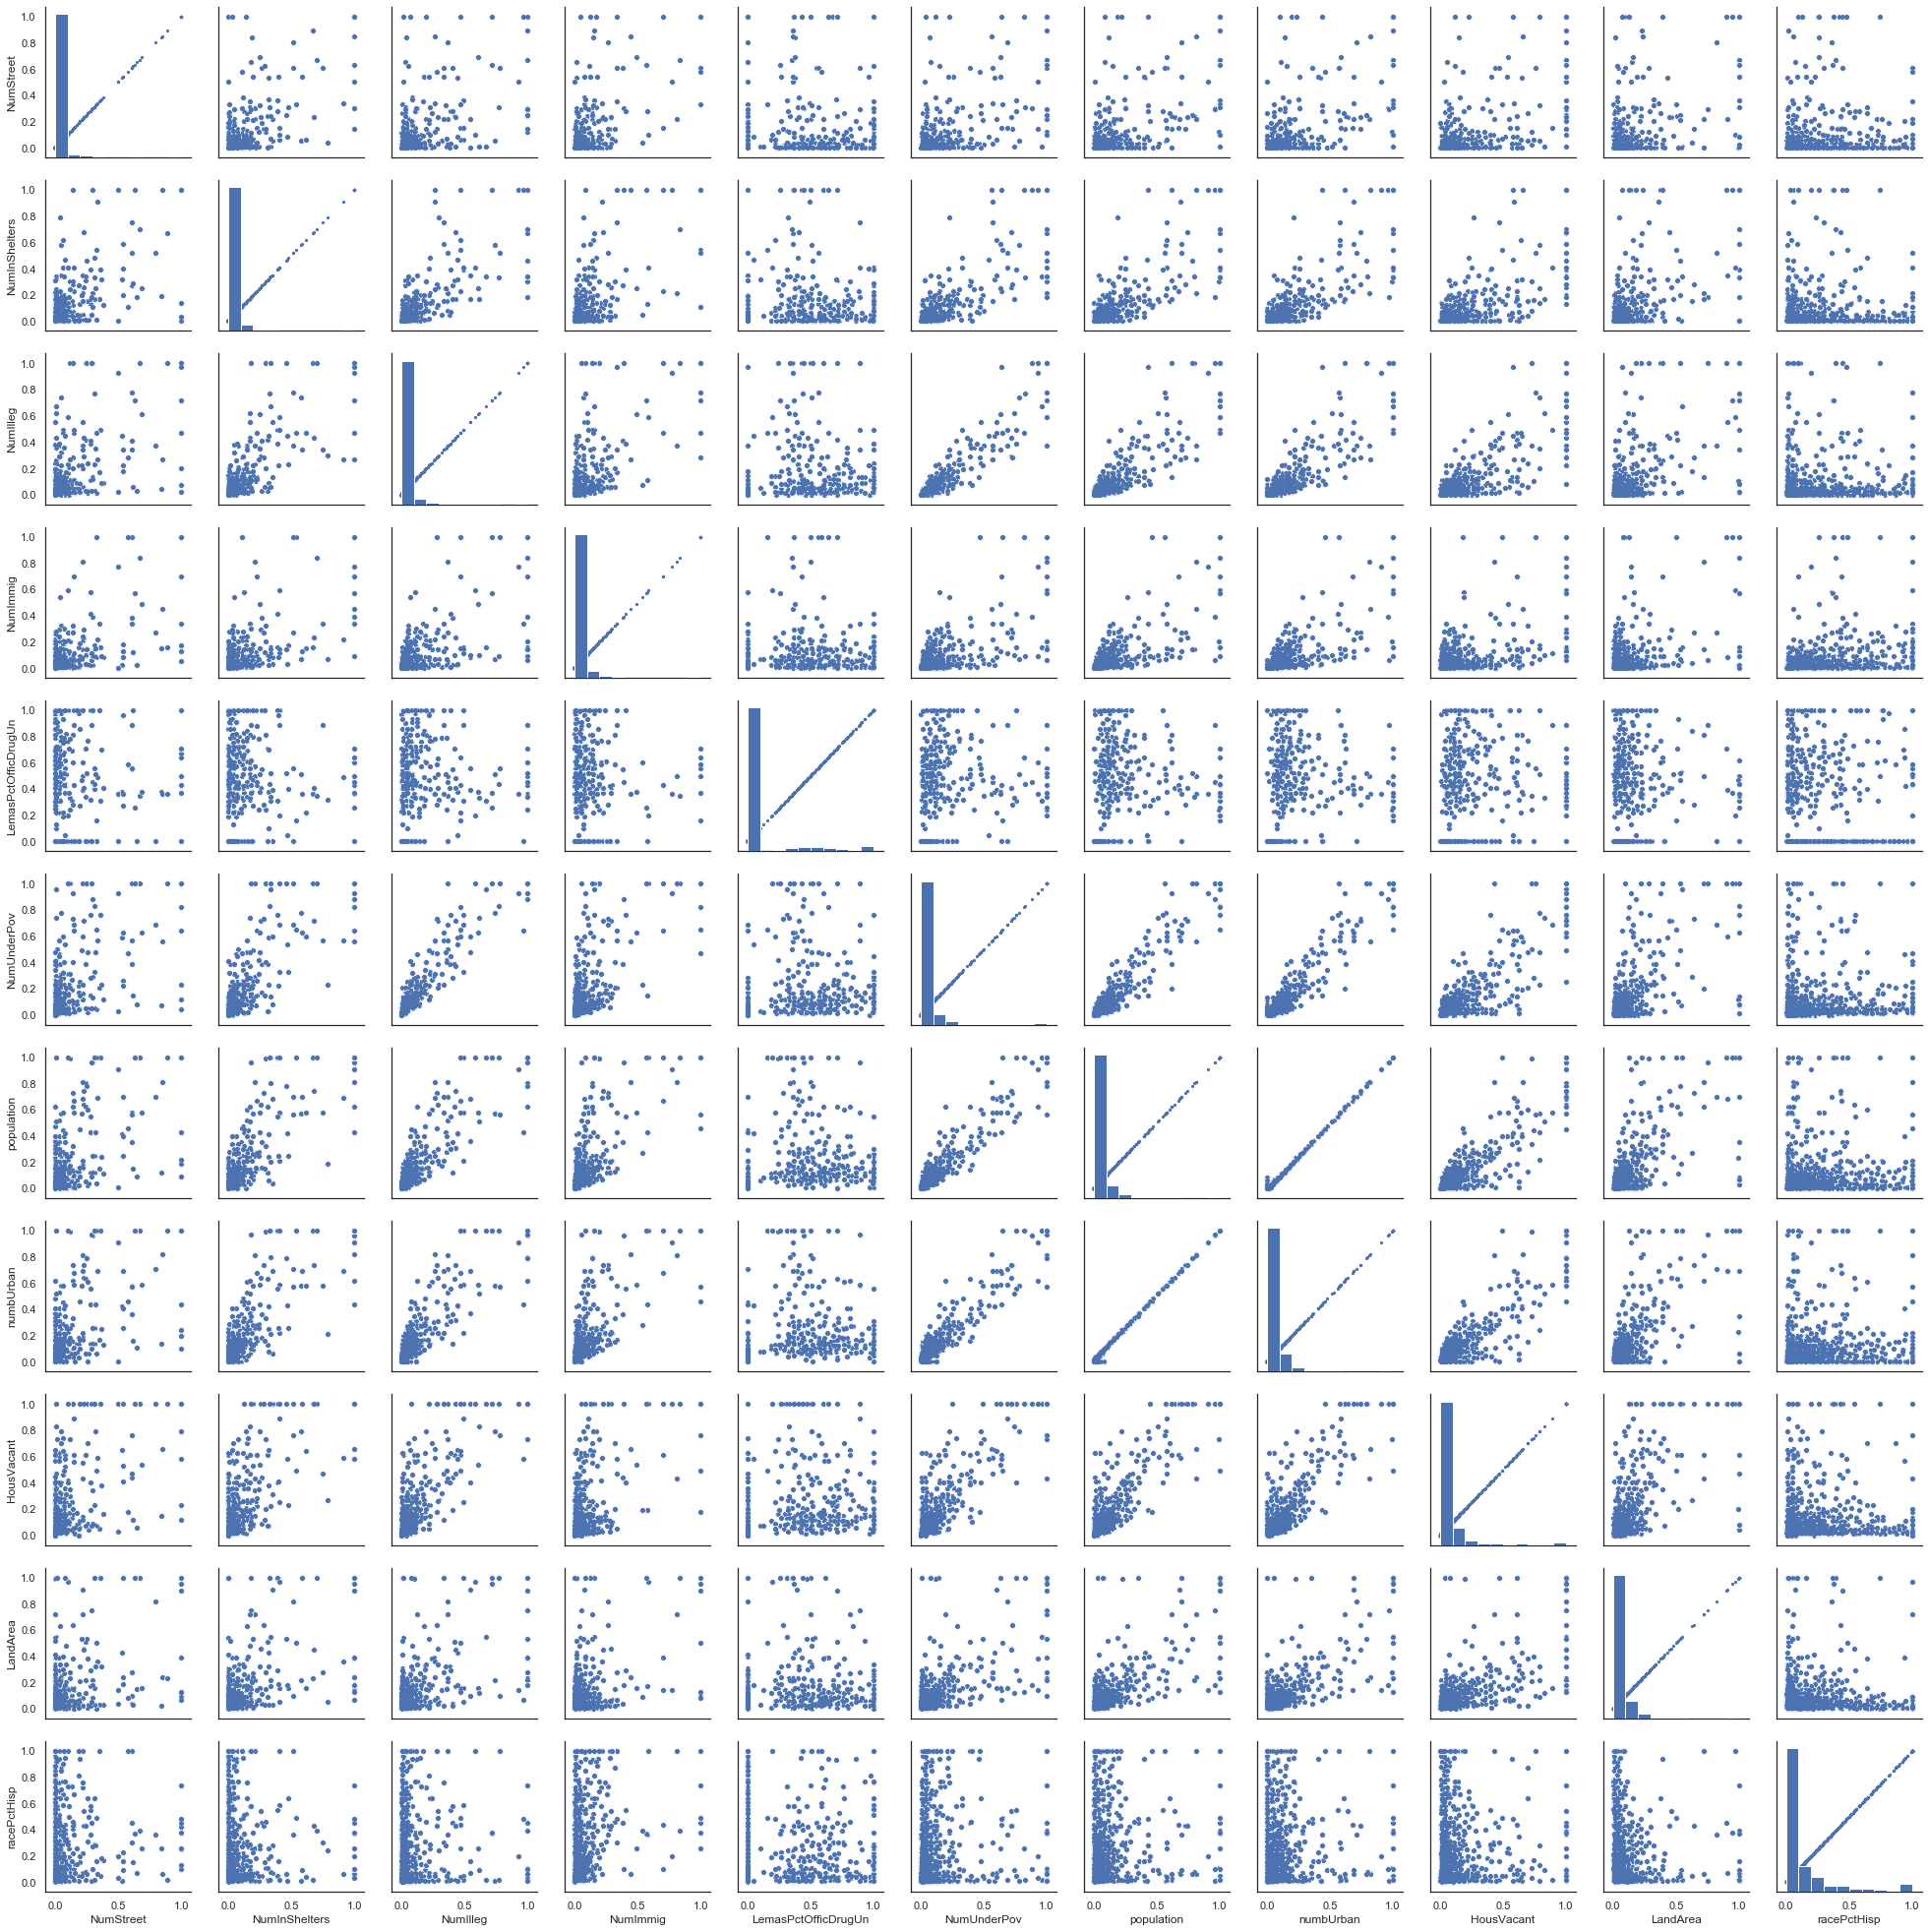

In [11]:
import seaborn as sns
#best_cv

#pair plots
g = sns.pairplot(best_cv)
g = g.map(plt.scatter, s=5)
# plt.show()


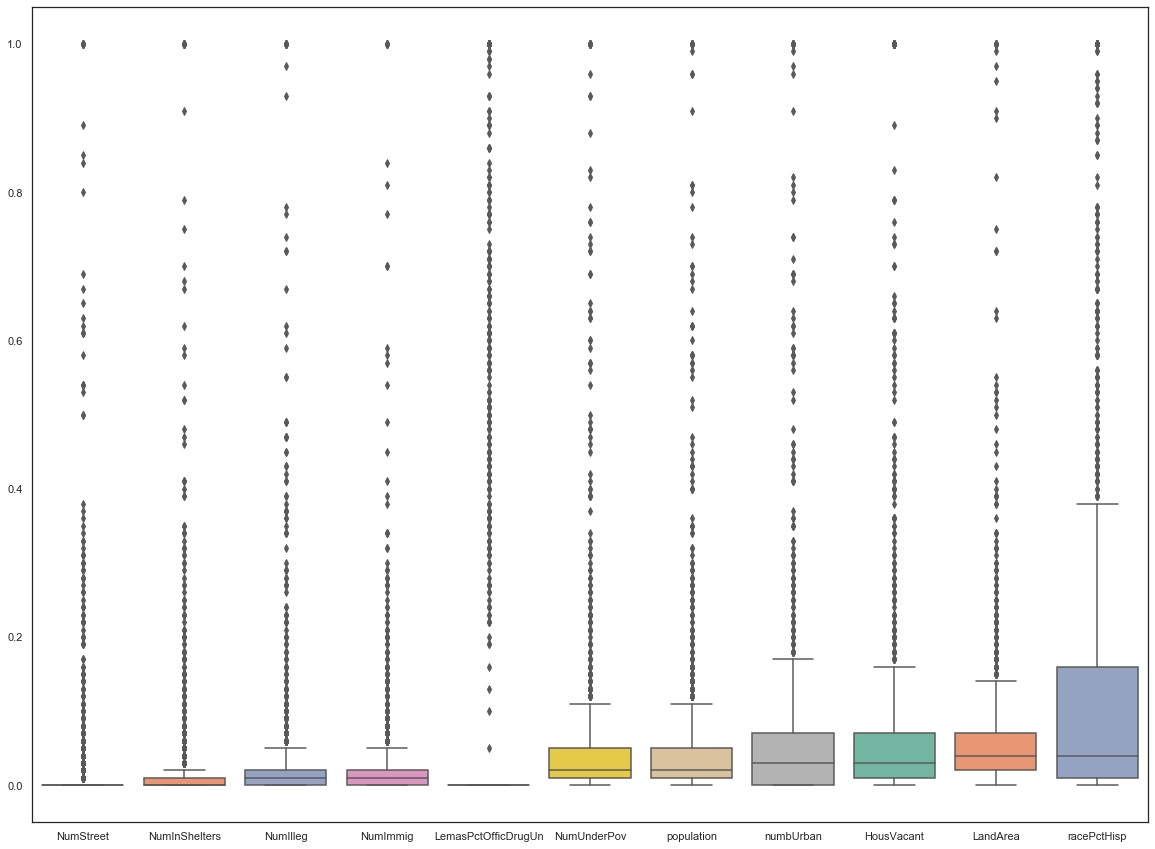

In [12]:
import matplotlib.pyplot as plt
#box plots
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=best_cv,  palette="Set2")
plt.show()

In [13]:
print("11 features:")
for i in al:
    print(i, '|', cv[i])

11 features:
NumStreet | 4.407702440863974
NumInShelters | 3.4854812687233436
NumIlleg | 2.9941964494842983
NumImmig | 2.9004971638852743
LemasPctOfficDrugUn | 2.555266002927139
NumUnderPov | 2.304969714852185
population | 2.203502536390972
numbUrban | 2.0017436381957676
HousVacant | 1.9587797297820901
LandArea | 1.6780314766044726
racePctHisp | 1.614277791710685


####  draw conclusions about significance of those features, just by the scatter plots

#### Ans:  
Accoding to the plots, some of the features maybe linearly co-related to each other, some of the features maybe non-linearly co-related to each other. 



## f. Fit a linear model using least squares to the training set and report the test error.

In [14]:
from sklearn.linear_model import LinearRegression

#new new_ignore_full_df
def split(full_df):
    train_df = pd.DataFrame()
    train_df = full_df.iloc[:1495,:]
    
    test_df = pd.DataFrame()
    test_df = full_df.iloc[1495:,:]
    
    y_train = train_df.iloc[:,-1]
    X_train = train_df.iloc[:,:-1]
    
    y_test = test_df.iloc[:,-1]
    X_test = test_df.iloc[:,:-1]
    return X_train, y_train, X_test, y_test


In [15]:
print(temp_df.shape)

(1994, 123)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

X_train, y_train, X_test, y_test = split(new_ignore_full_df)

LR = LinearRegression()
LR.fit(X_train,y_train)

y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

# train_error = mean_squared_error(y_train, y_train_pred)
train_error = mean_squared_error(y_train,y_train_pred)
test_error = mean_squared_error(y_test,y_test_pred)

# print("The Train Error is", train_error)
print("The Train error is:", train_error)
print("The Test Error is: ", test_error)

print(type(y_train_pred))
#

The Train error is: 0.016269615741741194
The Test Error is:  0.789725527433632
<class 'numpy.ndarray'>


## g. Fit a ridge regression model on the training set, with  入 chosen by cross-validation.

In [17]:
from sklearn.linear_model import RidgeCV

X_train_g, y_train_g, X_test_g, y_test_g = split(new_ignore_full_df)

rcv = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1,10,100],cv=5)
predictor = rcv.fit(X_train_g,y_train_g)

print("The best Lamda Value ",predictor.alpha_)

rcv_pred = predictor.predict(X_test_g)


mse =  mean_squared_error(y_test_g,rcv_pred)
print("The Test Error is",mse)

The best Lamda Value  1.0
The Test Error is 0.01773708110430369


## h. Fit a LASSO model on the training set, with 入 chosen by cross-validation.


In [18]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

X_train_h, y_train_h, X_test_h, y_test_h = split(new_ignore_full_df)

# pass alpha 100 times.
alp = np.array(np.linspace(0.001,100,100))
rcv = LassoCV(alphas= alp)
predictor = rcv.fit(X_train_h, y_train_h)
print("The best Lamda is ",predictor.alpha_)


rcv_pred = predictor.predict(X_test_h)
# rcv_pred = np.around(rcv_pred, decimals=2)

mse =  mean_squared_error(y_test_h,rcv_pred)
print("The Test Error without standardized  is",mse)

tmp_ft=[]
for i in range(len(rcv.coef_)):
    if rcv.coef_[i] != 0:
        tmp_ft.append(X_train_h.columns[i])

print("selected variables(number=%d): " %len(tmp_ft))
print(tmp_ft)
#-----------------------------------------------------------------------
scaler = StandardScaler()
scaler.fit(X_train_h)
X_train_h_2 = scaler.transform(X_train_h)

scaler.fit(X_test_h)
X_test_h_2 = scaler.transform(X_test_h)


predictor_2 = rcv.fit(X_train_h_2, y_train_h)
rcv_pred_2 = predictor_2.predict(X_test_h_2)

mse_2 =  mean_squared_error(y_test_h,rcv_pred_2)
print("The Test Error with standardized  is",mse_2)

tmp_ft_2=[]
for i in range(len(rcv.coef_)):
    if rcv.coef_[i] != 0:
        tmp_ft_2.append(X_train_h.columns[i])

print("selected variables(number=%d): " %len(tmp_ft_2))
print(tmp_ft_2)

The best Lamda is  0.001
The Test Error without standardized  is 0.01754528781156862
selected variables(number=23): 
['racepctblack', 'racePctWhite', 'agePct12t29', 'pctUrban', 'pctWPubAsst', 'AsianPerCap', 'MalePctDivorce', 'PctKids2Par', 'PctYoungKids2Par', 'PctWorkMom', 'PctIlleg', 'PctRecImmig10', 'PctPersDenseHous', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg', 'NumStreet', 'PctForeignBorn', 'PctSameCity85', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn']
The Test Error with standardized  is 0.017955051767110063
selected variables(number=68): 
['racepctblack', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Pa

|name|float|
|:----|-----:|
| test error without standardized| 0.01754528781156862|
| number of selected variables | 23|
| test Error with standardized | 0.017955051767110063|
| number of selected variables | 68|


## i. Fit a PCR model on the training set, with M chosen by cross-validation.

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.model_selection import KFold,  cross_val_score
from sklearn import model_selection

X_train_i, y_train_i, X_test_i, y_test_i = split(new_ignore_full_df)

# pca = PCA(n_components=9)
pca=PCA()
X_reduced = pca.fit_transform(X_train_i)
print(X_reduced.shape)

n = len(X_reduced)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)
regr = LinearRegression()
mse = []


score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train_i.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y_train_i.values.ravel(), 
                                               cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

min_arg = np.argmin(mse)
print("The number of principal components",min_arg) 
print("\n The Test Error is", mse)


(1495, 122)
The number of principal components 13

 The Test Error is [0.056545240946666395, 0.03801693131763221, 0.03065223196419507, 0.02762193920608243, 0.024252495668604275, 0.023088031664565023, 0.022578909345384153, 0.020055026996137114, 0.020081490769832778, 0.01998273868838008, 0.019926598219991286, 0.01994330745464718, 0.019981047873297336, 0.01988888413003632, 0.019901702799368204, 0.019935663374183902, 0.019948387968084423, 0.019975652851958535, 0.019981910015011005, 0.019997309113230603]


In [20]:
from sklearn.metrics import mean_squared_error

params = X_reduced[:,:min_arg]

X_test_reduced = pca.fit_transform(X_test_i) 
print(X_test_reduced.shape)
params1 = X_test_reduced[:,:min_arg]
# params1 = X_test_i[:,:min_min_arg

#train regression model
regr = LinearRegression()
# pcr_model = regr.fit(params, y_train_i.values.ravel()
pcr_model = regr.fit(params, y_train_i)

#predict
pcr_predict = pcr_model.predict(params1)
test_error = mean_squared_error(y_test_i,pcr_predict)
print("The Test Error is",test_error)

(499, 122)
The Test Error is 0.02636985901061923


### Ans:
As the following figure shows that test error may increase when M is bigger, to avoiding overfitting, I choose M belong[1,20] through cross validation. In this case, the best number of principal components is 13 and the test error is  0.02636985901061923. 

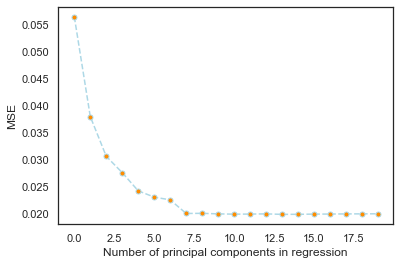

In [21]:
#plot the results
# plt.figure(figsize = (15,10))
plt.plot(mse, '-v',color='lightblue', linestyle='dashed', marker='o', markerfacecolor='darkorange', markersize=5)
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.xlim(xmin=-1);
# print(length)

## j.  fit a boosting tree to the data.

In [22]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

X_train, y_train, X_test, y_test = split(new_ignore_full_df)

YYY = xgb.DMatrix(data=X_train, label=y_train)

# alphas = np.linspace(0.1, 100.0, 10)
alphas = [10**i for i in range(-3,4)]
mses = []
for al in alphas:
    params = {"objective":"reg:squarederror", 'colsample_bytree': 0.3, 'learning_rate':0.1,
                         'max_depth': 5, 'alphas':al }
    cv_results = xgb.cv(dtrain= YYY,
                                        params = params,
                                        nfold = 5,
                                        num_boost_round=50,
                                        early_stopping_rounds =10, metrics="rmse",
                                        as_pandas=True, seed=123)
    mses.append((al, cv_results['test-rmse-mean'].iloc[-1]))
    
min_al = min(mses, key=lambda x: x[1])[0]

#-----------------------------------------------------------------------------------------------
    
xclf = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 0.1, 
                                                max_depth = 5, alpha =min_al, n_estimators = 10)

# gscv = GridSearchCV(xclf)

xclf_cv = GridSearchCV(estimator=xclf,  param_grid={'reg_alpha':alphas}, cv=10, verbose=1, 
                                        scoring="neg_mean_squared_error").fit(X_train.values, y_train)
# boost = xclf


print("The best alpha is ",xclf_cv.best_params_)
print("The Train error is ",-xclf_cv.best_score_)

boost = xclf.fit(X_train, y_train)
y_pred = boost.predict(X_test)
mse_boost = mean_squared_error(y_test, y_pred)
print('The Test error:', mse_boost)


Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best alpha is  {'reg_alpha': 0.01}
The Train error is  0.033642769425647624
The Test error: 0.030444610852396744


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    3.9s finished


# 2.Tree-Based Methods

## a. Download the APS Failure data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mypath = "D:/552 Machine Learning for Data Science/homework/Homework4/"
filename3 = "aps_failure_test_set.csv"
filename4 = "aps_failure_training_set.csv"

tree_train = pd.read_csv(mypath+filename4,skiprows=20)
tree_test = pd.read_csv(mypath+filename3,skiprows=20)

print(tree_train.shape)
print(tree_test.shape)

(60000, 171)
(16000, 171)


In [2]:
tree_train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,na,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,na,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,na,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,na,0,na,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,na,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


In [3]:
tree_test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
5,neg,174,na,26,24,0,0,na,na,na,...,na,na,na,na,na,na,na,na,0,0
6,neg,40202,na,640,606,0,0,0,0,0,...,526218,239734,439556,374248,169096,53658,41054,320,0,0
7,neg,120278,na,2130706432,256,0,0,0,0,0,...,1006722,459658,876356,689532,568540,500624,1006628,34820,0,0
8,neg,14592,0,2130706438,162,0,0,0,0,0,...,105024,57398,49152,38256,243268,145144,0,0,0,0
9,neg,28338,na,2130706432,238,0,0,0,0,0,...,357006,150056,264776,239282,140548,74750,32958,84,0,0


## b. Data preparation

In [4]:
#connect trian and test together
full = pd.concat([tree_train, tree_test], axis=0, ignore_index=True)
print(full.shape)

(76000, 171)


In [5]:
full

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,na,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,na,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,na,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,na,0,na,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,na,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


### i. Research what types of techniques are usually used for dealing with data with missing values.

#### Ans:
1> Delete: \
        a> Listwise: Listwise deletion (complete-case analysis) removes all data for an observation that has one or more missing values. \
        b> Pairwise: Pairwise deletion analyses all cases in which the variables of interest are present and thus maximizes all data available by an analysis basis.\ 
        c> Dropping Variables\
2> Time-Series Specific Methods:\
        a> Last Observation Carried Forward (LOCF) & Next Observation Carried Backward (NOCB)\
        b> Linear Interpolation\
        c> Seasonal Adjustment + Linear Interpolation\
3> Mean, Median and Mode:\
        Computing the overall mean, median or mode is a very basic imputation method, it is the only tested function that takes no advantage of the time series characteristics or relationship between the variables. It is very fast, but has clear disadvantages. One disadvantage is that mean imputation reduces variance in the dataset.\
4> Linear Regression\
5> Multiple Imputation\

#### Using mean:

In [6]:
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.base import TransformerMixin
from sklearn.impute import SimpleImputer

full = full.replace('na', np.NaN)
mis_class = full.iloc[:,1:]
new_column = mis_class.columns

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(mis_class)
mis_df = pd.DataFrame(imp.transform(mis_class))
mis_df.columns = new_column
# print(full.shape)

new_full_header = ['class']
for i in new_column:
    new_full_header.append(i)

print(len(new_full_header))

tmp = pd.DataFrame()
tmp = full.iloc[:,:1]

full_df = pd.concat([tmp, mis_df], axis=1)
print(full_df.shape)

171
(76000, 171)


In [7]:
full_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0,0.72556,2.130706e+09,280.000000,0.000000,0.000000,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.000000,0.000000
1,neg,33058.0,0.72556,0.000000e+00,150629.962105,0.000000,0.000000,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.000000,0.000000
2,neg,41040.0,0.72556,2.280000e+02,100.000000,0.000000,0.000000,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.000000,0.000000
3,neg,12.0,0.00000,7.000000e+01,66.000000,0.000000,10.000000,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.000000,32.000000
4,neg,60874.0,0.72556,1.368000e+03,458.000000,0.000000,0.000000,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.000000,0.000000
5,neg,38312.0,0.72556,2.130706e+09,218.000000,0.000000,0.000000,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.000000,0.000000
6,neg,14.0,0.00000,6.000000e+00,150629.962105,0.000000,0.000000,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.000000,0.000000
7,neg,102960.0,0.72556,2.130706e+09,116.000000,0.000000,0.000000,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.000000,0.000000
8,neg,78696.0,0.72556,0.000000e+00,150629.962105,0.000000,0.000000,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.000000,0.000000
9,pos,153204.0,0.00000,1.820000e+02,150629.962105,0.000000,0.000000,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.000000,0.000000


In [8]:
train_df = full_df.iloc[:60000,:]
train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0,0.72556,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058.0,0.72556,0.000000e+00,150629.962105,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040.0,0.72556,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12.0,0.00000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874.0,0.72556,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,neg,38312.0,0.72556,2.130706e+09,218.000000,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,neg,14.0,0.00000,6.000000e+00,150629.962105,0.0,0.0,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,neg,102960.0,0.72556,2.130706e+09,116.000000,0.0,0.0,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,neg,78696.0,0.72556,0.000000e+00,150629.962105,0.0,0.0,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,pos,153204.0,0.00000,1.820000e+02,150629.962105,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


In [9]:
test_df = full_df.iloc[60000:,:]
test_df


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
60000,neg,60.0,0.00000,2.000000e+01,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.098000e+03,1.380000e+02,4.120000e+02,6.540000e+02,7.800000e+01,8.800000e+01,0.000000e+00,0.000000,0.000000,0.000000
60001,neg,82.0,0.00000,6.800000e+01,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.068000e+03,2.760000e+02,1.620000e+03,1.160000e+02,8.600000e+01,4.620000e+02,0.000000e+00,0.000000,0.000000,0.000000
60002,neg,66002.0,2.00000,2.120000e+02,112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.950760e+05,3.803680e+05,4.401340e+05,2.695560e+05,1.315022e+06,1.536800e+05,5.160000e+02,0.000000,0.000000,0.000000
60003,neg,59816.0,0.72556,1.010000e+03,936.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.408200e+05,2.432700e+05,4.833020e+05,4.853320e+05,4.313760e+05,2.100740e+05,2.816620e+05,3232.000000,0.000000,0.000000
60004,neg,1814.0,0.72556,1.560000e+02,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.646000e+03,4.144000e+03,1.846600e+04,4.978200e+04,3.176000e+03,4.820000e+02,7.600000e+01,0.000000,0.000000,0.000000
60005,neg,174.0,0.72556,2.600000e+01,24.000000,0.000000,0.000000,200.430636,1204.761113,9697.328294,...,4.495763e+05,2.132460e+05,4.506478e+05,4.006204e+05,3.378689e+05,3.475611e+05,1.398968e+05,8424.983776,0.000000,0.000000
60006,neg,40202.0,0.72556,6.400000e+02,606.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.262180e+05,2.397340e+05,4.395560e+05,3.742480e+05,1.690960e+05,5.365800e+04,4.105400e+04,320.000000,0.000000,0.000000
60007,neg,120278.0,0.72556,2.130706e+09,256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.006722e+06,4.596580e+05,8.763560e+05,6.895320e+05,5.685400e+05,5.006240e+05,1.006628e+06,34820.000000,0.000000,0.000000
60008,neg,14592.0,0.00000,2.130706e+09,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.050240e+05,5.739800e+04,4.915200e+04,3.825600e+04,2.432680e+05,1.451440e+05,0.000000e+00,0.000000,0.000000,0.000000
60009,neg,28338.0,0.72556,2.130706e+09,238.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.570060e+05,1.500560e+05,2.647760e+05,2.392820e+05,1.405480e+05,7.475000e+04,3.295800e+04,84.000000,0.000000,0.000000


### ii. calculate the coeficient of variation CV = s/m

In [10]:
#train
tmp_full = pd.DataFrame()
tmp_full = full_df.drop('class',axis = 1).astype(float)
tmp_full = tmp_full.select_dtypes(include='float')

print(type(tmp_full))
print(tmp_full.shape)
mean = tmp_full.mean()
std = tmp_full.std()
cv = std/mean
cv

<class 'pandas.core.frame.DataFrame'>
(76000, 170)


aa_000      4.328608
ab_000      2.178273
ac_000      2.167653
ad_000    206.721500
ae_000     22.293670
af_000     18.209016
ag_000     91.460654
ag_001     42.084343
ag_002     17.625909
ag_003      8.753300
ag_004      5.475116
ag_005      2.964230
ag_006      2.352588
ag_007      2.812498
ag_008      6.274980
ag_009     32.167057
ah_000      2.315540
ai_000     18.506308
aj_000     43.144480
ak_000     78.622988
al_000      9.111991
am_0        9.067195
an_000      2.254227
ao_000      2.276114
ap_000      3.085885
aq_000      2.853471
ar_000     10.569202
as_000    113.882755
at_000     23.187060
au_000     86.085638
             ...    
dl_000     37.456647
dm_000     34.551802
dn_000      2.875142
do_000      2.174454
dp_000      2.009346
dq_000     21.184599
dr_000      6.585971
ds_000      2.289989
dt_000      2.165110
du_000      2.796194
dv_000      3.452224
dx_000      5.105320
dy_000      7.516916
dz_000     49.248806
ea_000     32.777270
eb_000      4.542099
ec_00       2

### iii. Plot a correlation matrix

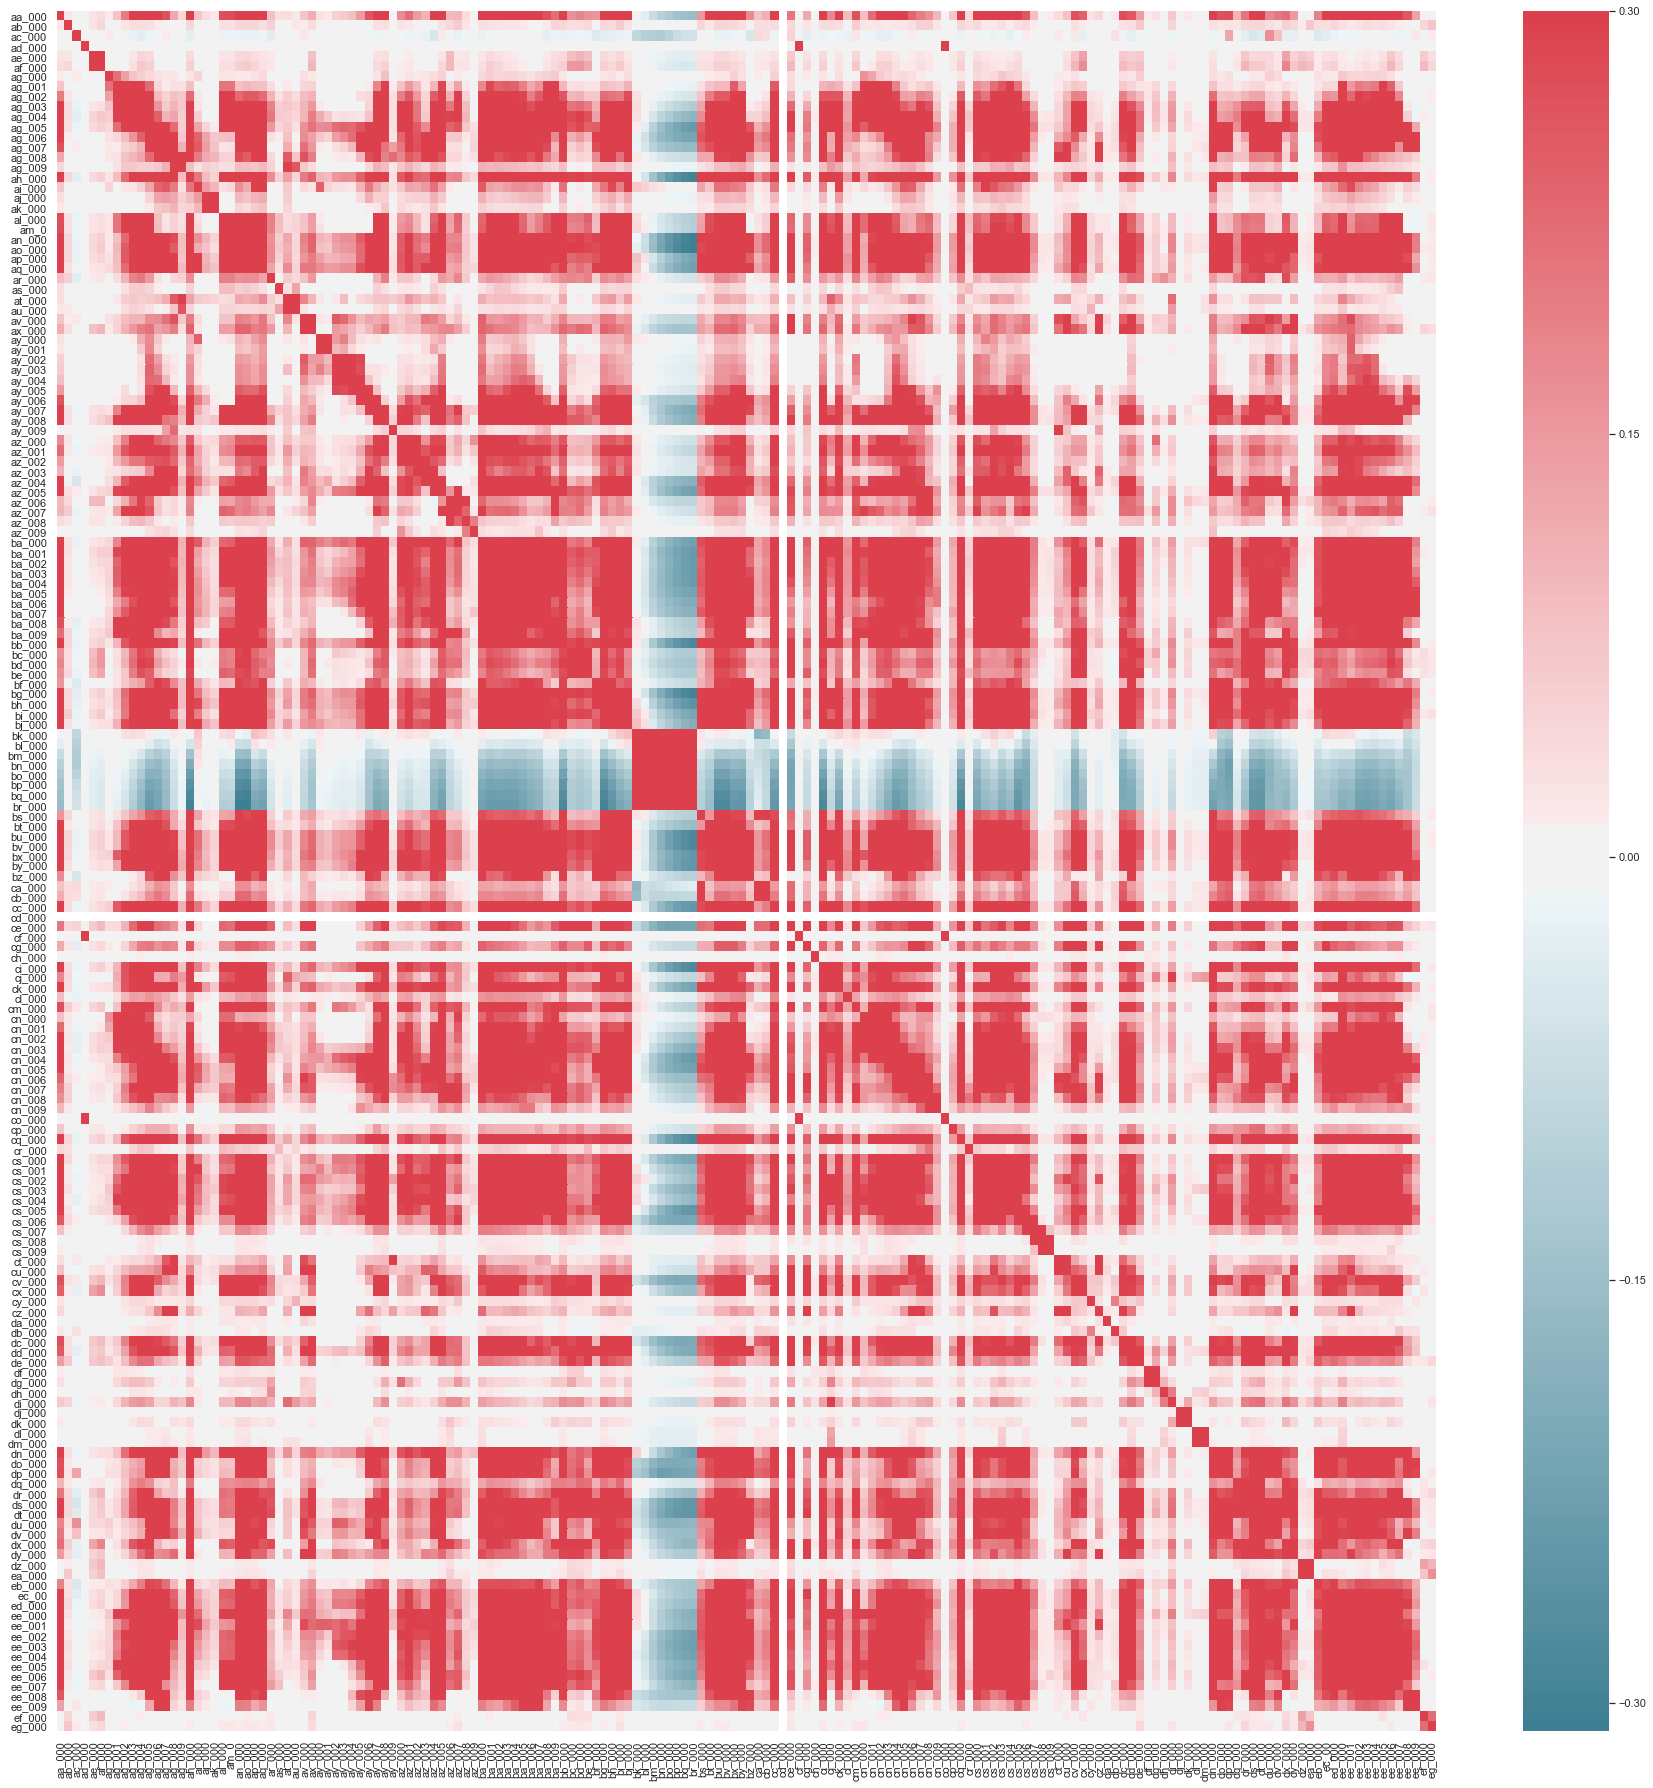

In [11]:
import seaborn as sns
sns.set(style="white")

corr = tmp_full.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25,25))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
                           xticklabels=corr.columns.values,
                           yticklabels=corr.columns.values)
plt.tight_layout()
plt.show()

### iv. Pick b√170c features with highest CV

In [12]:
import math
num = math.sqrt(170)
num = int(num)
print(num)

a = cv.sort_values(ascending = False)[:num]
print(a)

#get header
al = list(a.keys())
print('features name: ',al)
best_cv = pd.DataFrame()
best_cv = tmp_full[al]

best_cv

13
cf_000    207.270274
co_000    206.876129
ad_000    206.721500
cs_009    192.522611
dj_000    122.128153
as_000    113.882755
dh_000    112.652450
df_000    111.369666
ag_000     91.460654
au_000     86.085638
ak_000     78.622988
az_009     77.999556
ay_009     77.461101
dtype: float64
features name:  ['cf_000', 'co_000', 'ad_000', 'cs_009', 'dj_000', 'as_000', 'dh_000', 'df_000', 'ag_000', 'au_000', 'ak_000', 'az_009', 'ay_009']


,cf_000,co_000,ad_000,cs_009,dj_000,as_000,dh_000,df_000,ag_000,au_000,ak_000,az_009,ay_009
0,2.000000,220.000000,280.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,150231.156793,150517.375485,150629.962105,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.000000,100.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
3,2.000000,2.000000,66.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.000000,202.000000,458.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
5,2.000000,2.000000,218.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
6,150231.156793,150517.375485,150629.962105,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
7,2.000000,6.000000,116.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
8,150231.156793,150517.375485,150629.962105,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,2.0,0.0
9,150231.156793,150517.375485,150629.962105,0.0,0.00000,0.0,55760.000000,0.000000,0.0,0.0,0.000000,0.0,0.0


In [13]:
header_14 = ['class']
for i in al:
    header_14.append(i)
header_14

cv_14 = pd.DataFrame()
cv_14 = full_df[header_14]
# print(cv_14)
print(cv_14.shape)


(76000, 14)


In [14]:
cv_14

,class,cf_000,co_000,ad_000,cs_009,dj_000,as_000,dh_000,df_000,ag_000,au_000,ak_000,az_009,ay_009
0,neg,2.000000,220.000000,280.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,neg,150231.156793,150517.375485,150629.962105,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
2,neg,0.000000,0.000000,100.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
3,neg,2.000000,2.000000,66.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
4,neg,0.000000,202.000000,458.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
5,neg,2.000000,2.000000,218.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
6,neg,150231.156793,150517.375485,150629.962105,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
7,neg,2.000000,6.000000,116.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
8,neg,150231.156793,150517.375485,150629.962105,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,2.0,0.0
9,pos,150231.156793,150517.375485,150629.962105,0.0,0.00000,0.0,55760.000000,0.000000,0.0,0.0,0.000000,0.0,0.0


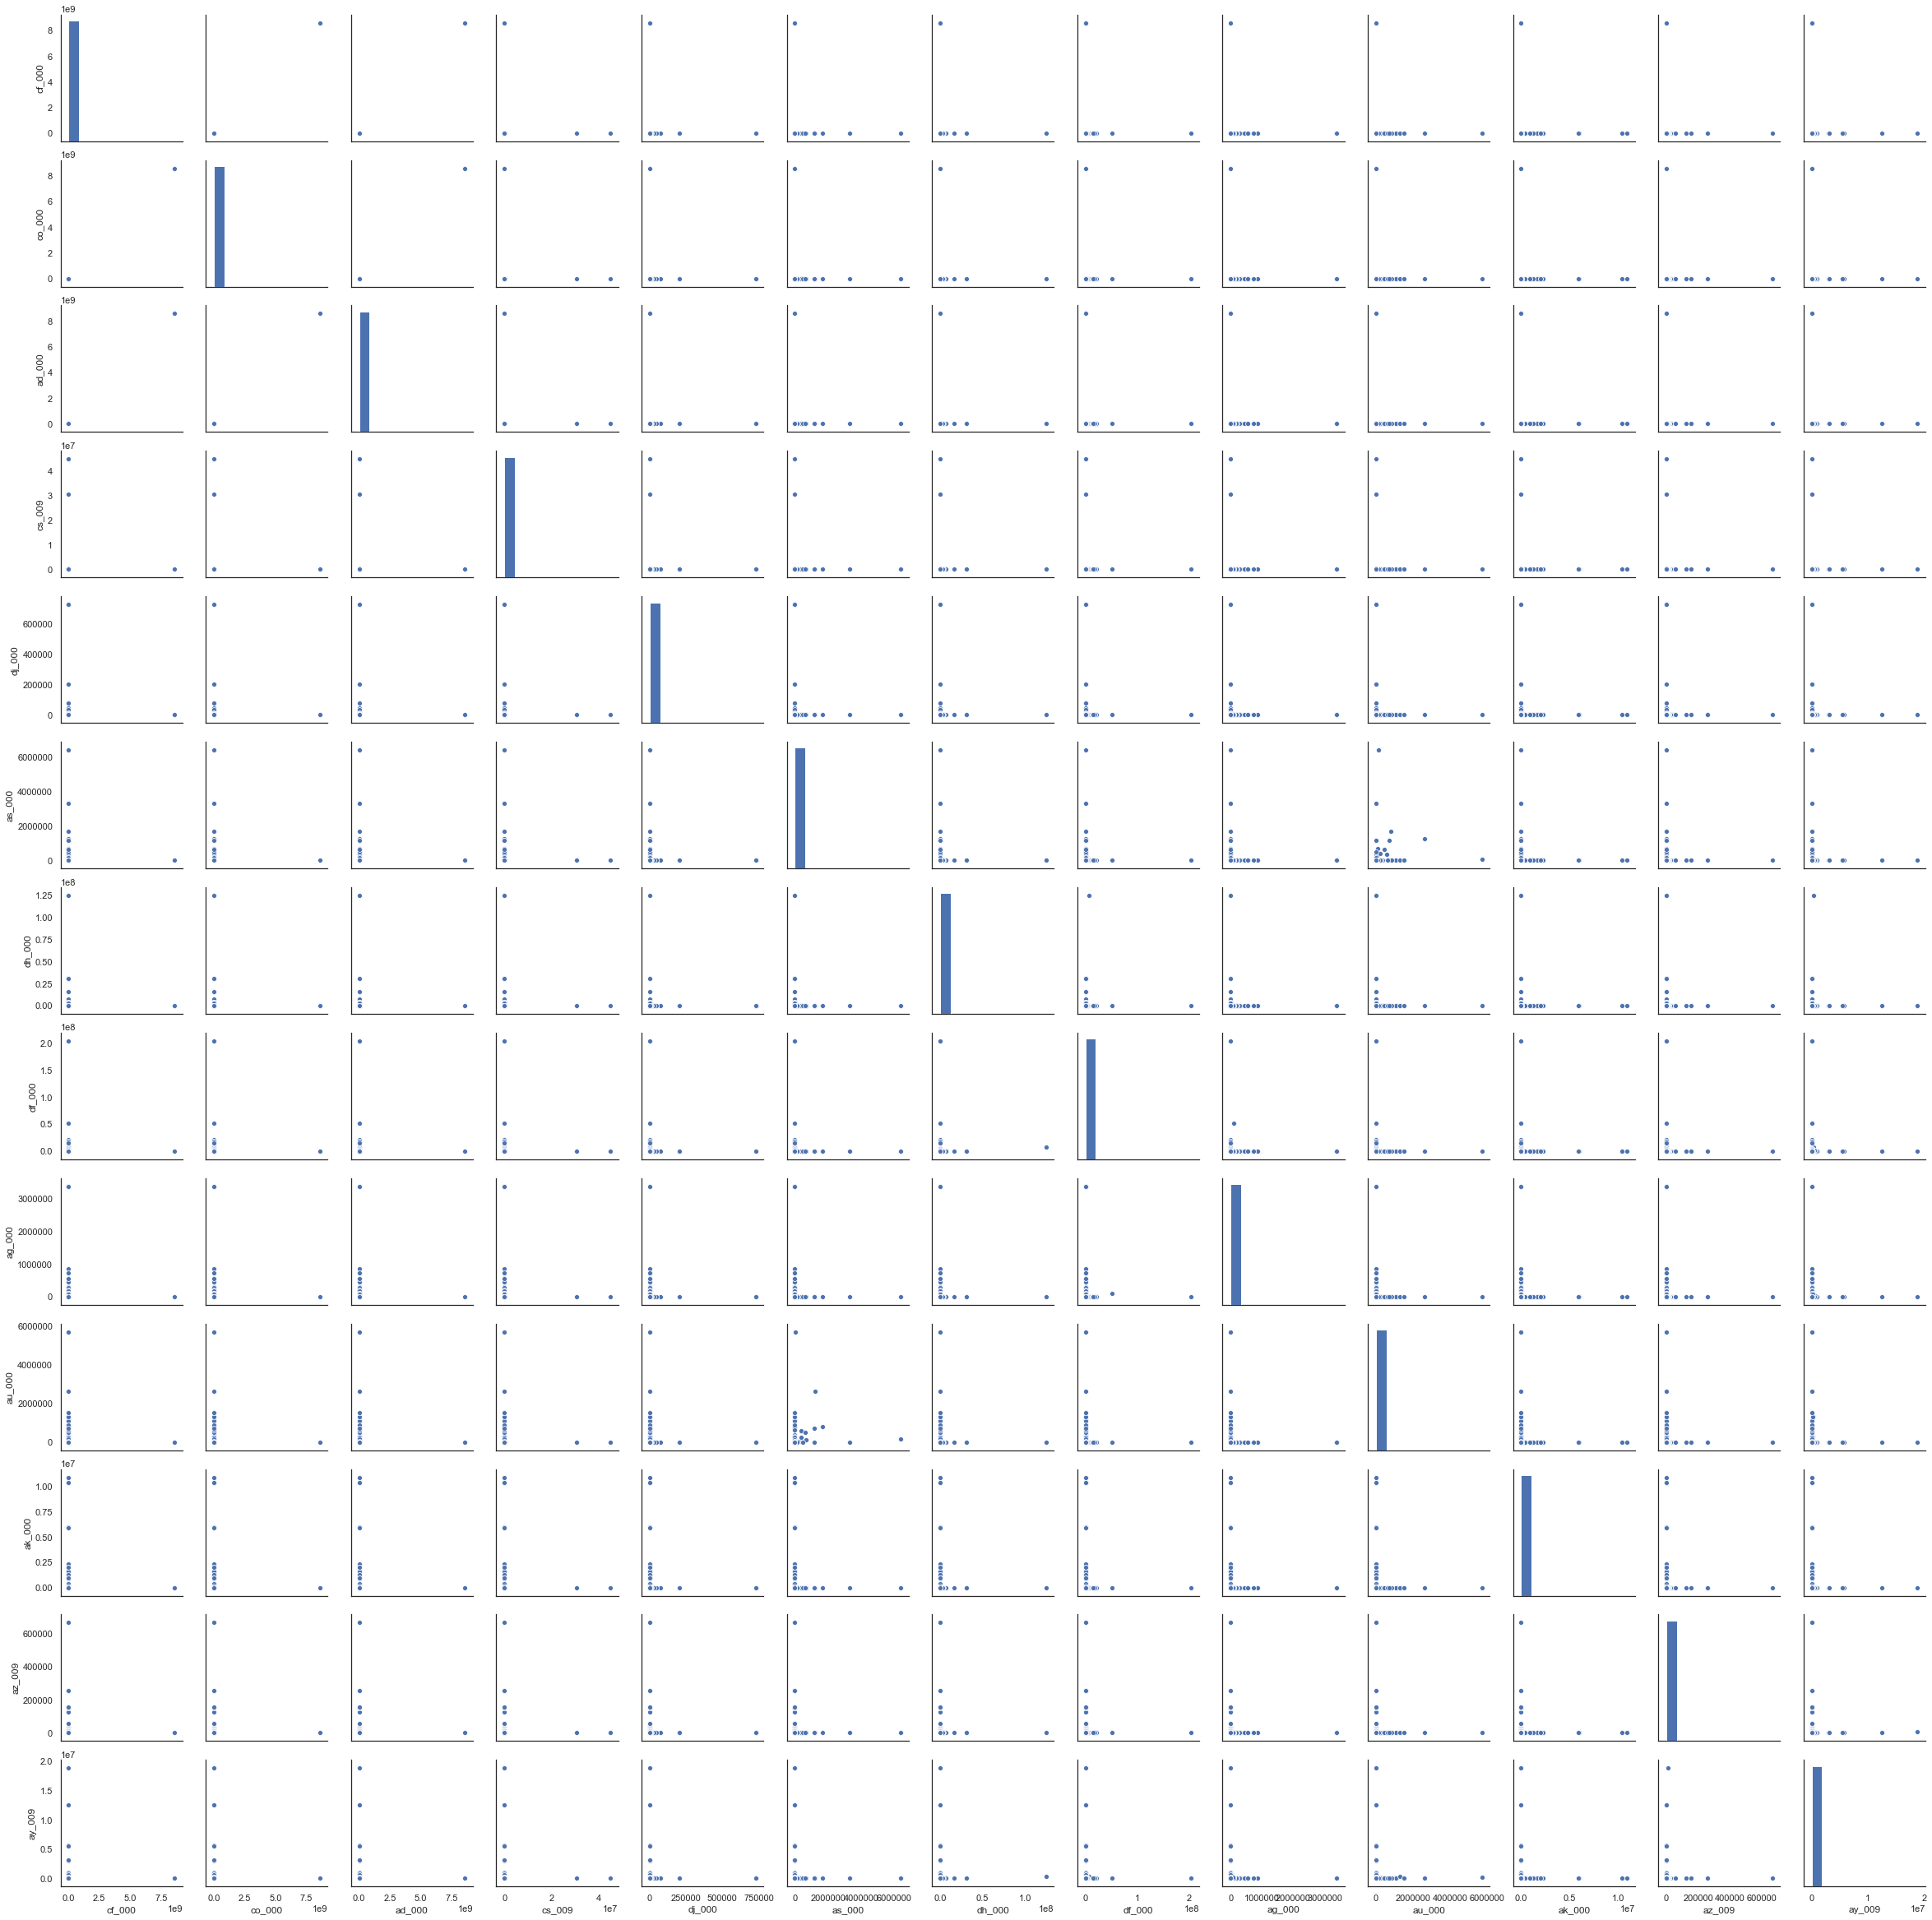

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 

# sns.set(style="ticks", color_codes=True)
g = sns.pairplot(best_cv)
# g.map(plt.scatter, s=5)
plt.show()

14


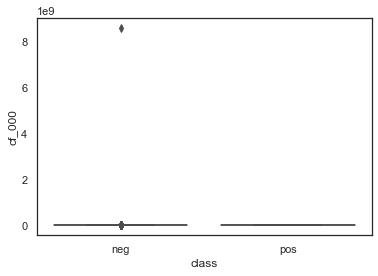

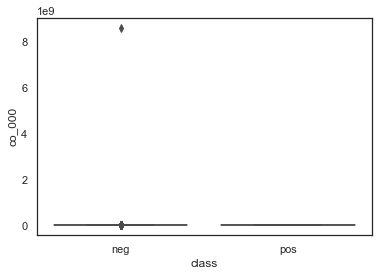

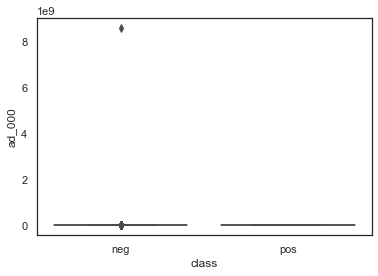

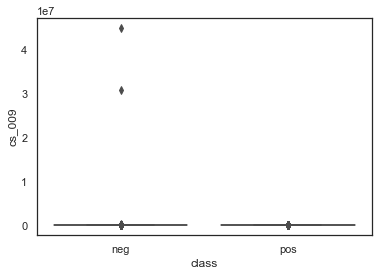

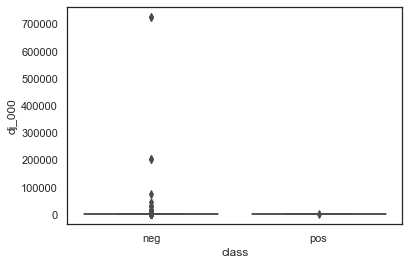

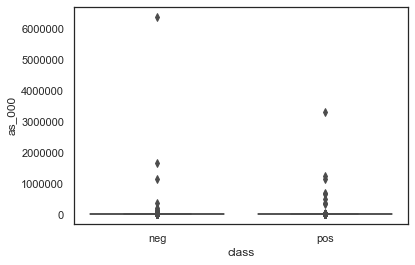

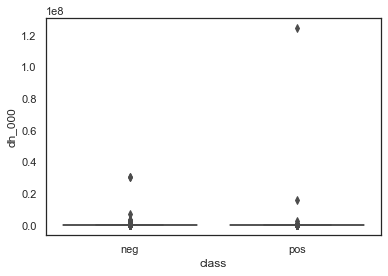

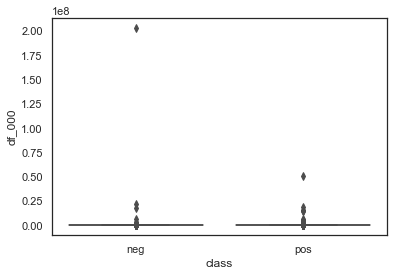

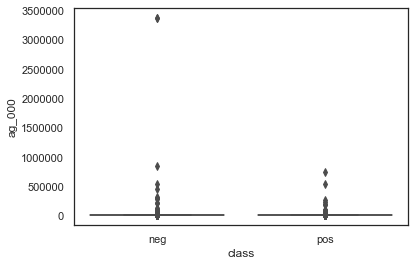

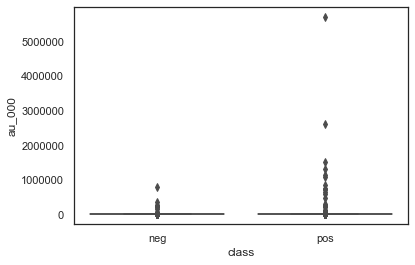

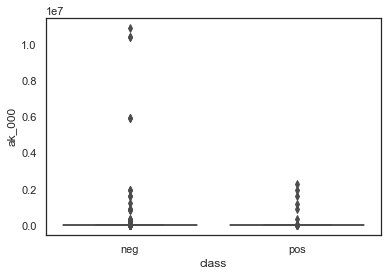

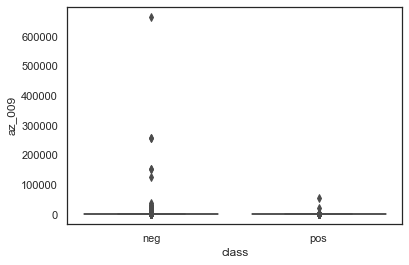

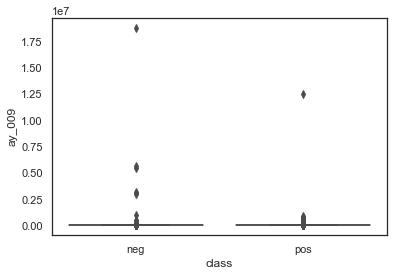

In [16]:
#box plot
import seaborn as sns

colors = ['blue','pink']
labels = ['neg','pos']
len_ = cv_14.shape[1]
print(len_)

for i in range(1, len_):
    sns.boxplot(x=cv_14.iloc[:,0], y=cv_14.iloc[:,i])
    plt.show()



#### Draw conclusions about significance of those features, just by the scatter plots

#### Ans:
1. Most of the data is missing in siginificant number of the columns
2. Majority of the predictors are linearly co-related to each other

### v. count the number of neg and pos

In [17]:
num_neg = 0
num_pos = 0

for i in full_df['class']:
    if i == 'neg':
        num_neg += 1
    else:
        num_pos += 1

print("negative:",num_neg)
print("positive:", num_pos)

#full_df['class'].value_counts()

negative: 74625
positive: 1375


#### Ans: it seems very imbalanced and this data set is not good.

## c. 

### Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set.


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import accuracy_score

#train_df
# print(train_df)
rf_y = train_df['class']
rf_y = [0 if x=='neg' else 1 for x in rf_y]
rf_x = train_df.drop(columns = 'class')

#test
rf_test_y = test_df['class']
rf_test_y = [0 if x=='neg' else 1 for x in rf_test_y]
rf_test_x = test_df.drop(columns = 'class')


#classifiers
rf_clf = RandomForestClassifier( random_state=0, n_estimators=100,n_jobs=-1, max_depth = 2,
                                                             oob_score = True).fit(rf_x, rf_y)

#train
rf_y_pred_tr = rf_clf.predict(rf_x)
rf_y_pred_tr_op = rf_clf.predict_proba(rf_x)

#test
rf_y_pred_te= rf_clf.predict(rf_test_x)
rf_y_pred_te_op = rf_clf.predict_proba(rf_test_x)

In [34]:
#AUC for train & test
from sklearn.metrics import accuracy_score

auc_tr = accuracy_score(rf_y_pred_tr, rf_y)
auc_te= accuracy_score(rf_y_pred_te, rf_test_y)

# print(auc_tr)
print("Misclassification rate of train  is:", (1-auc_tr))

# print(auc_te)
print("Misclassification rate of test is:", (1-auc_te))

Misclassification rate of train  is: 0.013900000000000023
Misclassification rate of test is: 0.019062499999999982


[[58978    22]
 [  812   188]]


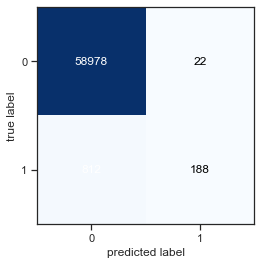

[[15624     1]
 [  304    71]]


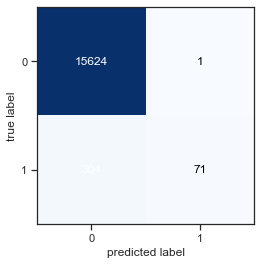

In [35]:
#confusion_matrix for train & test
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
class_names = ["neg","pos"]
classes=class_names

#train
cm_train = confusion_matrix(rf_y, rf_y_pred_tr)
print(cm_train)
plot_confusion_matrix(cm_train)
plt.show()

#test
cm_test = confusion_matrix(rf_test_y, rf_y_pred_te)
print(cm_test)
plot_confusion_matrix(cm_test)
plt.show()


train auc 0.9723404237288135


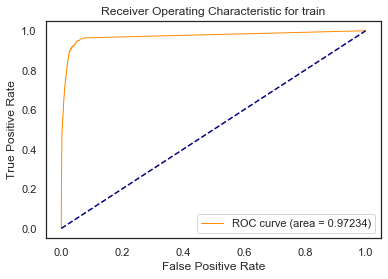

test auc 0.9805469013333333


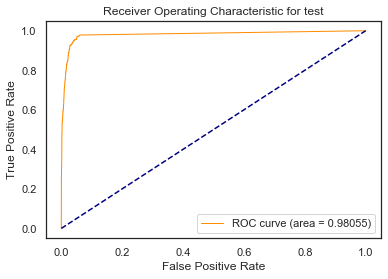

In [36]:
#ROC for train & test
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,  confusion_matrix
op = rf_y_pred_tr_op[:,1]

#train
fpr_tr, tpr_tr, thresholds = roc_curve(rf_y, op)
roc_auc_tr = auc(fpr_tr, tpr_tr)
print("train auc",roc_auc_tr)

plt.title('Receiver Operating Characteristic for train')
plt.plot(fpr_tr, tpr_tr,color='darkorange', lw=1,  
                 label='ROC curve (area = %0.5f)' % roc_auc_tr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#test
op_te = rf_y_pred_te_op[:,1]
fpr_te, tpr_te, thresholds_te = roc_curve(rf_test_y, op_te)
roc_auc_te = auc(fpr_te, tpr_te)
print("test auc",roc_auc_te)

plt.title('Receiver Operating Characteristic for test')
plt.plot(fpr_te, tpr_te,color='darkorange', lw=1,  
                 label='ROC curve (area = %0.5f)' % roc_auc_te)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error

OOB = rf_clf.oob_score_
print("the OOB error is: ", 1-OOB)

error_test = np.mean( rf_test_y != rf_y_pred_te)
print("the test error is: ", error_test)

error_train = np.mean( rf_y != rf_y_pred_tr)
print("the train error is: ", error_train)

the OOB error is:  0.014100000000000001
the test error is:  0.0190625
the train error is:  0.0139


## d. Research how class imbalance is addressed in random forests.

### Ans:

#### 1. One is based on cost sensitive learning .It is to make random forest more suitable for learning from extremely imbalanced data follows the idea of cost sensitive learning.

#### 2. One is based on a sampling technique The Balanced Random Forest (BRF)



In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler 

#train_df
# print(train_df)
rf_y_2 = train_df['class']
rf_y_2 = [0 if x=='neg' else 1 for x in rf_y_2]
rf_x_2 = train_df.drop(columns = 'class')

#test
rf_test_y_2 = test_df['class']
rf_test_y_2 = [0 if x=='neg' else 1 for x in rf_test_y_2]
rf_test_x_2 = test_df.drop(columns = 'class')



#classifiers
rf_clf_2 = RandomForestClassifier( random_state=0,n_estimators=100,n_jobs=-1,max_depth = 4,
                                                 oob_score = True, class_weight="balanced").fit(rf_x_2, rf_y_2)

#random over sample
# ros = RandomOverSampler(random_state=42)
# rf_x_2, rf_y_2 = ros.fit_sample(rf_x_2, rf_y_2)

#classfiers
rf_clf_2 = RandomForestClassifier(random_state=0,n_estimators=100,n_jobs=-1, 
                                max_depth=4,oob_score=True).fit(rf_x_2, rf_y_2)
# rf_clf_2 = ros.fit(rf_x_2, rf_y_2)

#


#train
rf_y_pred_tr_2 = rf_clf_2.predict(rf_x_2)
rf_y_pred_tr_op_2 = rf_clf_2.predict_proba(rf_x_2)

#test
rf_y_pred_te_2= rf_clf_2.predict(rf_test_x_2)
rf_y_pred_te_op_2 = rf_clf_2.predict_proba(rf_test_x_2)

In [29]:
#misclassification error for train & test
from sklearn.metrics import accuracy_score

auc_tr_2 = accuracy_score(rf_y_pred_tr_2, rf_y_2)
auc_te_2= accuracy_score(rf_y_pred_te_2, rf_test_y_2)

# print(auc_tr)
print("Misclassification rate of train  is:", (1-auc_tr_2))

# print(auc_te)
print("Misclassification rate of test is:", (1-auc_te_2))

Misclassification rate of train  is: 0.009333333333333305
Misclassification rate of test is: 0.013562500000000033


[[58975    25]
 [  535   465]]


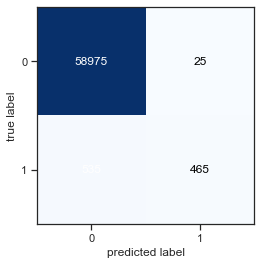

[[15619     6]
 [  211   164]]


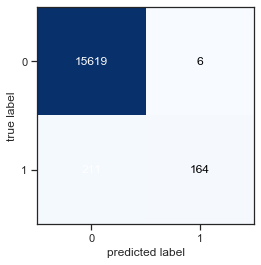

In [30]:
#confusion_matrix for train & test
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
class_names = ["neg","pos"]
classes=class_names

#train
cm_train_2 = confusion_matrix(rf_y_2, rf_y_pred_tr_2)
print(cm_train_2)
plot_confusion_matrix(cm_train_2)
plt.show()

#test
cm_test_2 = confusion_matrix(rf_test_y_2, rf_y_pred_te_2)
print(cm_test_2)
plot_confusion_matrix(cm_test_2)
plt.show()


train auc 0.9845010423728813


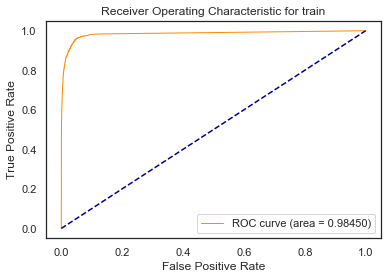

test auc 0.9920583679999999


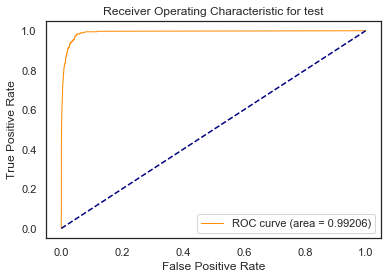

In [31]:
#ROC for train & test
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,  confusion_matrix
op_2 = rf_y_pred_tr_op_2[:,1]

#train
fpr_tr_2, tpr_tr_2, thresholds = roc_curve(rf_y_2, op_2)
roc_auc_tr_2 = auc(fpr_tr_2, tpr_tr_2)
print("train auc",roc_auc_tr_2)

plt.title('Receiver Operating Characteristic for train')
plt.plot(fpr_tr_2, tpr_tr_2,color='darkorange', lw=1,  
                 label='ROC curve (area = %0.5f)' % roc_auc_tr_2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#test
op_te_2 = rf_y_pred_te_op_2[:,1]
fpr_te_2, tpr_te_2, thresholds_te_2 = roc_curve(rf_test_y_2, op_te_2)
roc_auc_te_2 = auc(fpr_te_2, tpr_te_2)
print("test auc",roc_auc_te_2)

plt.title('Receiver Operating Characteristic for test')
plt.plot(fpr_te_2, tpr_te_2,color='darkorange', lw=1,  
                 label='ROC curve (area = %0.5f)' % roc_auc_te_2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error

OOB_2 = rf_clf_2.oob_score_
print("the OOB error is: ", 1-OOB_2)

error_test_2 = np.mean( rf_test_y_2 != rf_y_pred_te_2)
print("the test error is: ", error_test_2)

error_train_2 = np.mean( rf_y_2 != rf_y_pred_tr_2)
print("the train error is: ", error_train_2)

the OOB error is:  0.010199999999999987
the test error is:  0.0135625
the train error is:  0.009333333333333334


### Ans: comparing imbalance and balance data:
|type| error|
|:---|----:|
|imbalance oob error| 0.014100000000000001 |
|imbalance train error|0.0139|
|imbalance test error|  0.0190625 |
|balance oob error|0.010199999999999987|
|balance train error|0.009333333333333334|
|balance test error| 0.0135625|


## e. Model Tress

In [50]:
from sklearn.model_selection import learning_curve, GridSearchCV
from past.builtins import xrange
import weka.core.jvm as jvm
jvm.start()
import weka.core.converters as converters
from weka.classifiers import Evaluation
from weka.core.classes import Random
from weka.classifiers import Classifier
 
y_train = train_df['class']
X_train = train_df.drop(columns = 'class')

y_test = test_df['class']
X_test = test_df.drop(columns = 'class')

#train
weka_y_train = y_train
weka_y_train = y_train.replace({0:'neg', 1:'pos'})
weka_train = pd.concat([X_train, weka_y_train], axis=1)
weka_train.to_csv(sep=",", path_or_buf="weka_train.csv", index=False)

#classifiers
cls = Classifier(classname="weka.classifiers.trees.LMT")
data = converters.load_any_file("weka_train.csv")
data.class_is_last()

cls.build_classifier(data)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['D:\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'D:\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'D:\\Anaconda3\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'D:\\Anaconda3\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'D:\\Anaconda3\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


### weka for train

In [51]:
print("train:")
evl = Evaluation(data)
evl.crossvalidate_model(classifier=cls, data=data, num_folds= 5, rnd=Random(1))

print(evl.percent_correct)
print(evl.summary())
print(evl.class_details())

train:
99.16666666666667

Correctly Classified Instances       59500               99.1667 %
Incorrectly Classified Instances       500                0.8333 %
Kappa statistic                          0.7174
Mean absolute error                      0.0119
Root mean squared error                  0.0825
Relative absolute error                 36.3706 %
Root relative squared error             64.4397 %
Total Number of Instances            60000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.352    0.994      0.997    0.996      0.722    0.966     0.998     neg
                 0.648    0.003    0.814      0.648    0.722      0.722    0.966     0.757     pos
Weighted Avg.    0.992    0.346    0.991      0.992    0.991      0.722    0.966     0.994     



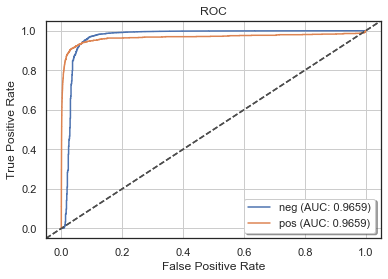

array([[58852.,   148.],
       [  352.,   648.]])

In [52]:
from weka.plot.classifiers import plot_roc
import weka.plot.classifiers as plcls

plcls.plot_roc(evl, class_index=[0, 1], wait=True)
# plot_roc(evl, class_index=[0,1])
evl.confusion_matrix

### weka for test

In [53]:
weka_y_test = y_test
weka_y_test = y_test.replace({0:'neg', 1:'pos'})
weka_test = pd.concat([X_test, weka_y_test], axis=1)
weka_test.to_csv(sep=",", path_or_buf="weka_test.csv", index=False)
# cls = Classifier(classname="weka.classifiers.trees.LMT")
data = converters.load_any_file("weka_test.csv")
data.class_is_last()

In [54]:
print("test")
evl = Evaluation(data)
evl.test_model(classifier=cls, data=data)
print(evl.summary())

test

Correctly Classified Instances       15846               99.0375 %
Incorrectly Classified Instances       154                0.9625 %
Kappa statistic                          0.7726
Mean absolute error                      0.0132
Root mean squared error                  0.0885
Relative absolute error                 28.7664 %
Root relative squared error             58.5102 %
Total Number of Instances            16000     



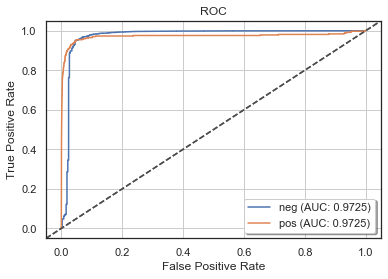

array([[15577.,    48.],
       [  106.,   269.]])

In [55]:
from weka.plot.classifiers import plot_roc
import weka.plot.classifiers as plcls

plcls.plot_roc(evl, class_index=[0, 1], wait=True)
evl.confusion_matrix

## f. using SMOTE to pre-process data

In [56]:
from imblearn.over_sampling import SMOTE 
from imblearn.combine import SMOTETomek
from collections import Counter

 
y_train = train_df['class']
X_train = train_df.drop(columns = 'class')

y_test = test_df['class']
X_test = test_df.drop(columns = 'class')

#========smote=========================================== 
sm = SMOTE(kind='regular')
# sm = SMOTETomek()
X_r, y_r = sm.fit_sample(X_train, y_train)


#===================================================
X_r = pd.DataFrame(X_r)
y_r = pd.DataFrame(y_r,columns=["170"])


smote_y_train = y_r
smote_y_train = smote_y_train.replace({0:'neg', 1:'pos'})

smote_train = pd.concat([X_r, smote_y_train], axis=1)
smote_train.to_csv(sep=",", path_or_buf="smote_train.csv", index=False)

In [57]:
cls = Classifier(classname="weka.classifiers.trees.LMT")
smote_data = converters.load_any_file("smote_train.csv")
smote_data.class_is_last()
cls.build_classifier(smote_data)

### smote for train

In [58]:
evl = Evaluation(smote_data)
evl.crossvalidate_model(classifier=cls, data=smote_data, num_folds= 5, rnd=Random(1))
print(evl.percent_correct)
print(evl.summary())
print(evl.class_details())


97.68474576271187

Correctly Classified Instances      115268               97.6847 %
Incorrectly Classified Instances      2732                2.3153 %
Kappa statistic                          0.9537
Mean absolute error                      0.0407
Root mean squared error                  0.1382
Relative absolute error                  8.1494 %
Root relative squared error             27.6391 %
Total Number of Instances           118000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.978    0.024    0.976      0.978    0.977      0.954    0.994     0.994     neg
                 0.976    0.022    0.978      0.976    0.977      0.954    0.994     0.992     pos
Weighted Avg.    0.977    0.023    0.977      0.977    0.977      0.954    0.994     0.993     



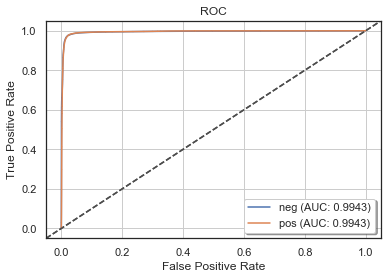

array([[57698.,  1302.],
       [ 1430., 57570.]])

In [59]:
from weka.plot.classifiers import plot_roc
import weka.plot.classifiers as plcls

plcls.plot_roc(evl, class_index=[0, 1], wait=True)
evl.confusion_matrix

### smote for test

In [60]:

y_test = test_df['class']
X_test = test_df.drop(columns = 'class')

smote_y_test = y_test
smote_y_test = y_test.replace({0:'neg', 1:'pos'})
smote_test = pd.concat([X_test, smote_y_test], axis=1)
smote_test.to_csv(sep=",", path_or_buf="smote_test.csv", index=False)
# cls = Classifier(classname="weka.classifiers.trees.LMT")

smote_data_test = converters.load_any_file("smote_test.csv")
smote_data_test.class_is_last()

In [61]:
evl = Evaluation(smote_data_test)
evl.test_model(classifier=cls, data=smote_data_test)
print(evl.summary())


Correctly Classified Instances       15707               98.1688 %
Incorrectly Classified Instances       293                1.8313 %
Kappa statistic                          0.6789
Mean absolute error                      0.0277
Root mean squared error                  0.123 
Relative absolute error                 60.5142 %
Root relative squared error             81.3031 %
Total Number of Instances            16000     



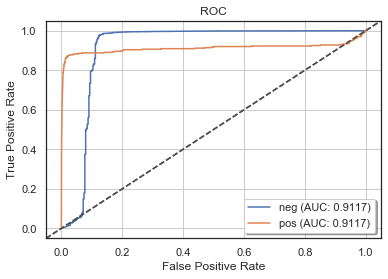

array([[15384.,   241.],
       [   52.,   323.]])

In [62]:
from weka.plot.classifiers import plot_roc
import weka.plot.classifiers as plcls
from six.moves import xrange

plcls.plot_roc(evl, class_index=[0, 1], wait=True)
evl.confusion_matrix


In [63]:
jvm.stop()

#### Ans:
|type|score|
|:-----|-----:|
|weka train correct| 99.1669%|
|weka train incorrect| 0.8333%|
|weka test correct|99.0375%|
|weka test incorrect|0.9625%|
|smote train correct| 97.6847%|
|smote train incorrect|2.3153%|
|smote test correct|98.1688%|
|smote test incorrect|1.8313%|

# 3. ISLR 6.8.3

#### a (iv)Steadily decreases:
as $s$ is increased, there is less and less constraint on the model and it should always have a better training error (if $s$ is increased to $s'$, then the best model using a budget of $s$ would be included when using a budget of $s'$)


#### b  (ii) Decrease initially, and then eventually start increasing in a U shape
test error will improve (decrease) to a point and then will worsen (increase) as constraints loosen and model overfits


#### c (iii) Steadily increase
variance always increases with fewer constraints

#### d (iv) Steadily decrease
bias always decreases with more model flexibility

#### e (v) Remains constant
 irreducible error is model independent and hence irrespective of the choice of $s$, remains constant.

# 4. ISLR, 6.8.5

### a 
Ridge: minimize $(y_1 - \hat\beta_1x_{11} - \hat\beta_2x_{12})^2 + (y_2 - \hat\beta_1x_{21} - \hat\beta_2x_{22})^2 + \lambda (\hat\beta_1^2 + \hat\beta_2^2)$


### b 
#### step 1:
from a:
$$(y_1 - \hat\beta_1 x_{11} - \hat\beta_2 x_{12})^2 + (y_2 - \hat\beta_1 x_{21} - \hat\beta_2 x_{22})^2 + \lambda (\hat\beta_1^2 + \hat\beta_2^2) \\
= (y_1^2 + \hat\beta_1^2 x_{11}^2 + \hat\beta_2^2 x_{12}^2 - 2 \hat\beta_1 x_{11} y_1 - 2 \hat\beta_2 x_{12} y_1 + 2 \hat\beta_1 \hat\beta_2 x_{11} x_{12}) \\
+ (y_2^2 + \hat\beta_1^2 x_{21}^2 + \hat\beta_2^2 x_{22}^2 - 2 \hat\beta_1 x_{21} y_2 - 2 \hat\beta_2 x_{22} y_2 + 2 \hat\beta_1 \hat\beta_2 x_{21} x_{22}) \\
+ \lambda \hat\beta_1^2 + \lambda \hat\beta_2^2$$

#### step 2
Taking the partial deritive to $\hat\beta_1$ and setting equation to 0 to minimize:
$$ (2\hat\beta_1x_{11}^2-2x_{11}y_1+2\hat\beta_2x_{11}x_{12}) + (2\hat\beta_1x_{21}^2-2x_{21}y_2+2\hat\beta_2x_{21}x_{22}) + 2\lambda\hat\beta_1 = 0$$

#### step 3
Setting $x_{11}=x_{12}=x_1$ and $x_{21}=x_{22}=x_2$ and dividing both sides of the equation by 2:
$$(\hat\beta_1x_1^2-x_1y_1+\hat\beta_2x_1^2) + (\hat\beta_1x_2^2-x_2y_2+\hat\beta_2x_2^2) + \lambda\hat\beta_1 = 0$$

$$\hat\beta_1 (x_1^2+x_2^2) + \hat\beta_2 (x_1^2+x_2^2) + \lambda\hat\beta_1 = x_1y_1 + x_2y_2$$

#### step 4
Add $2\hat\beta_1x_1x_2$ and $2\hat\beta_2x_1x_2$ to both sides of the equation:
$$\hat\beta_1 (x_1^2 + x_2^2 + 2x_1x_2) + \hat\beta_2 (x_1^2 + x_2^2 + 2x_1x_2) + \lambda\hat\beta_1 = x_1y_1 + x_2y_2 + 2\hat\beta_1x_1x_2 + 2\hat\beta_2x_1x_2 \\
\hat\beta_1 (x_1 + x_2)^2 + \hat\beta_2 (x_1 + x_2)^2 + \lambda\hat\beta_1 = x_1y_1 + x_2y_2 + 2\hat\beta_1x_1x_2 + 2\hat\beta_2x_1x_2$$

#### step 5
Because $x_1+x_2=0$, we can eliminate the first two terms:
$$\lambda\hat\beta_1 = x_1y_1 + x_2y_2 + 2\hat\beta_1x_1x_2 + 2\hat\beta_2x_1x_2$$

#### step 6
Similarly by taking the partial deritive to $\hat\beta_2$, we can get the equation:
$$\lambda\hat\beta_2 = x_1y_1 + x_2y_2 + 2\hat\beta_1x_1x_2 + 2\hat\beta_2x_1x_2$$

#### step 7
The left side of the equations for both $\lambda\hat\beta_1$ and $\lambda\hat\beta_2$ are the same so we have:
$$\lambda\hat\beta_1 = \lambda\hat\beta_2$$
$$\hat\beta_1 = \hat\beta_2$$

### c
Lasso: minimize $(y_1 - \hat\beta_1x_{11} - \hat\beta_2x_{12})^2 + (y_2 - \hat\beta_1x_{21} - \hat\beta_2x_{22})^2 + \lambda (|\hat\beta_1| + |\hat\beta_2|)$


### d Ans: Peiying_Lyu_HW4_ISLR_.pdf
Replacing the constraint term from Part b, the derivative term to $\beta$ is:
$$\frac{\partial }{\partial \hat\beta} (\lambda |\beta|): \lambda\frac{|\beta|}{\beta}$$
$$\lambda\frac{|\beta_1|}{\beta_1} = \lambda\frac{|\beta_2|}{\beta_2}$$
So it seems that the lasso just requires that $\beta_1$ and $\beta_2$ are both positive or both negative (ignoring possibility of 0...)



# 5. ISLR, 8.4.5

In [ ]:
#Majority approach
p = [0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75]

sum_b = 0
sum_s = 0

for i in p:
    if i >= 0.5:
        sum_b +=i
    else:
        sum_s += i
        
print(sum_b)
print(sum_s)

#### Ans:
sum(p >= 0.5) > sum(p < 0.5)
so, the number of red predictions is greater than the number of green predictions based on a 50% threshold, thus RED.

In [ ]:
#Average approach
sum = sum_b + sum_s
mean = sum/(len(p))
print(mean)

#### Ans:
The average of the probabilities is less than the 50% threshold, thus GREEN.

# 6. ISLR 9.7.3

#### Ans: Peiying_lyu_hw4_ISLR.pdf